In [5]:
from scipy.integrate import quad
from scipy.integrate import odeint
from scipy.optimize  import curve_fit
from scipy.special   import sici, spherical_jn
from math import cos, sin, exp, log, sqrt

import numpy as np
import matplotlib.pyplot as pl

pl.rcParams.update ({"font.size": 18, "figure.figsize": (12, 9)})

from cosmology import Cosmology
from powerSpectrum import PowerSpectrum

P = PowerSpectrum ()

def P_delta (k):
    return 

def P_psi (k):
    return P.power (k)/k**4

class GL:
    def __init__ (self, n):
        self.n = n
        self.x_gl, self.w_gl = np.polynomial.legendre.leggauss (self.n)
        
    def integrate (self, func, a = 0, b = 1):
        sum = 0
        for i in range (0, len (self.x_gl)):
            x = a+(b-a)*(1+self.x_gl[i])/2
            sum += self.w_gl[i]*func (x)
        return sum*(b-a)/2

print(P_psi(0.0001))
print(P_psi(0.01))
print(P_psi(10))
print(P_psi(1000))

5104402146450.724
3086081.613190242
4.5856669652066736e-11
9.557932709148753e-28


In [6]:
def term_1 (k2, k3):
    return 2*P.power (k2)+P.power (k3)

def term_2 (k2, k3):
    Int = GL (32)
    eps = 1e-2
    def mu_integral (k):
        return Int.integrate \
            (lambda mu: mu**2*(k2-k*mu)**2*P_psi (sqrt (k2**2+k**2-2*k2*k*mu)),
             -1, 1)
    return k2**4*quad \
        (lambda k: mu_integral (k)*P.power (k),
         0, np.inf, epsrel = eps, limit = 256)[0]

def term_3 (k2, k3, theta):
    return k2**3*k3**3*(k2+k3*cos (theta))*(k2*cos (theta)+k3)*P_psi (k2)*P_psi (k3)

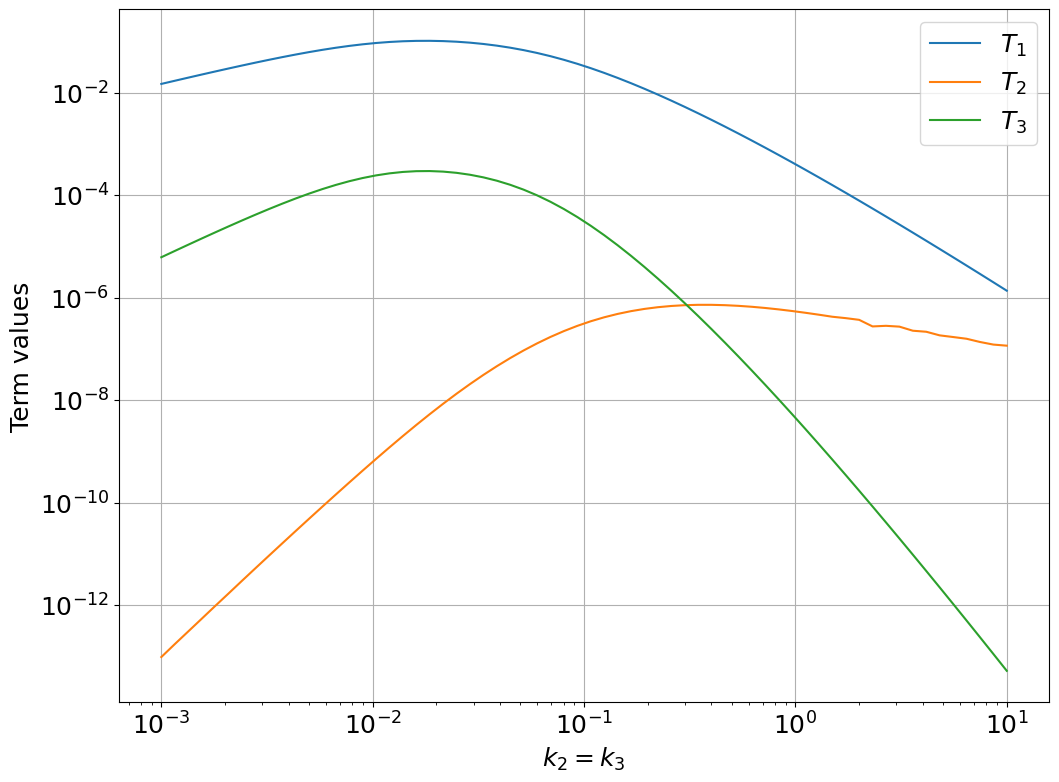

In [7]:
k = np.logspace (-3, 1, 64)
pl.plot (k, [term_1 (v, v) for v in k],
         label = "$T_1$")
pl.plot (k, [term_2 (v, v) for v in k],
         label =
             "$T_2$")
pl.plot (k, [term_3 (v, v, 2*np.pi/3) for v in k],
         label =
             "$T_3 $")
pl.legend (loc = "best")
pl.xscale ("log")
pl.yscale ("log")
pl.xlabel ("$k_2 = k_3$")
pl.ylabel ("Term values")
pl.grid ()

pl.savefig("C:/Users/Jay/Desktop/Master Thesis/fig1.pdf", bbox_inches="tight")
pl.show ()




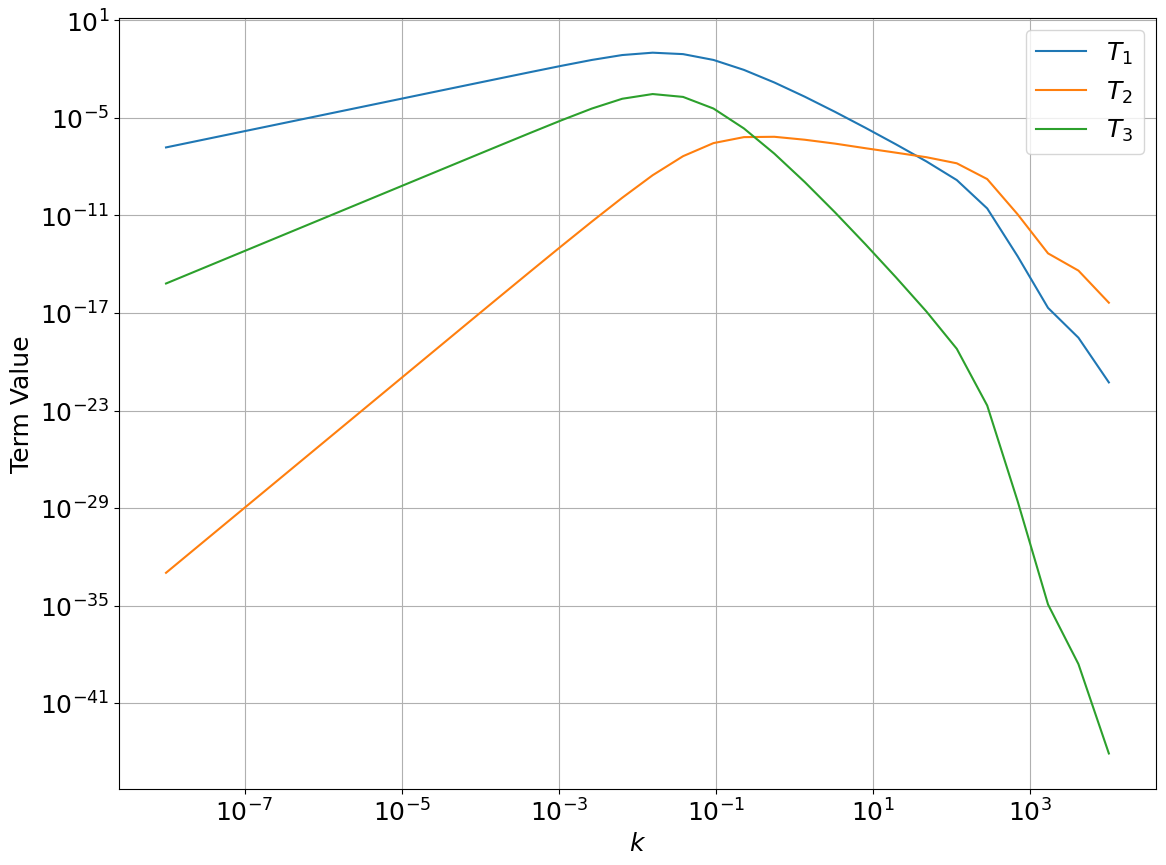

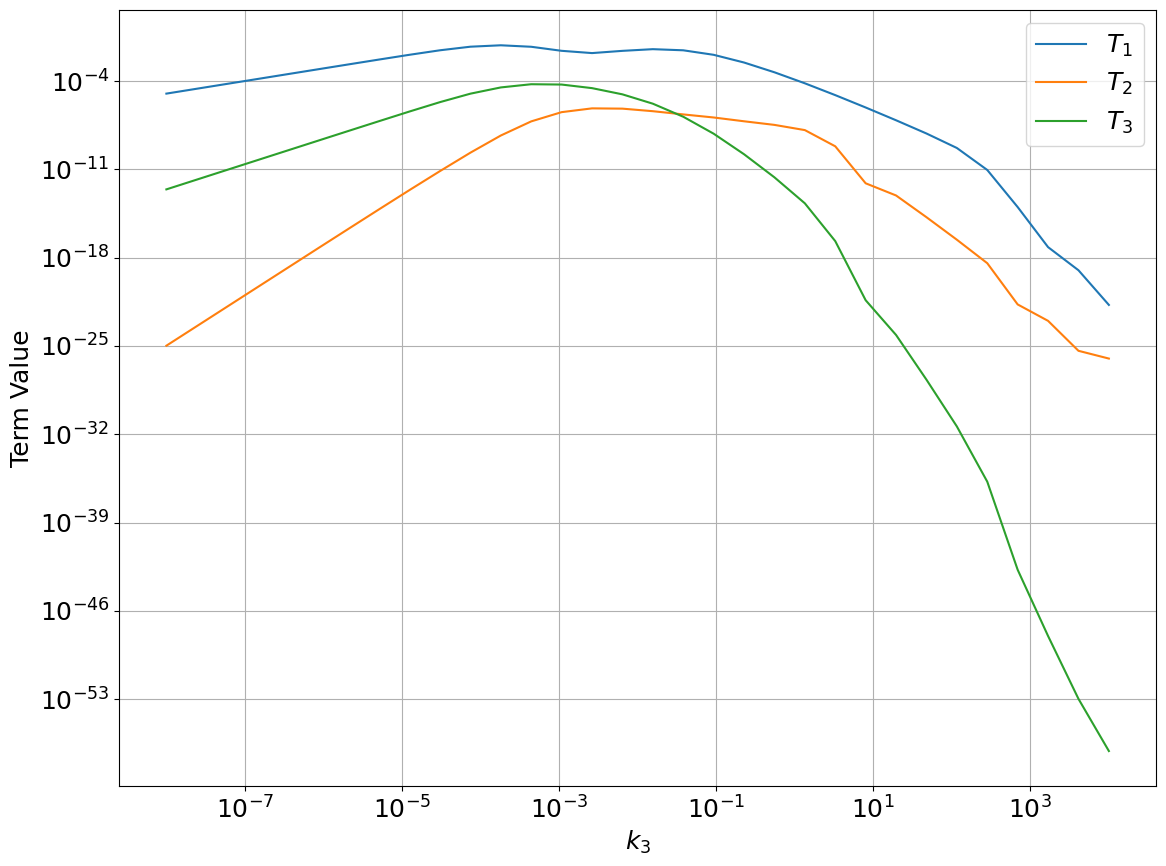

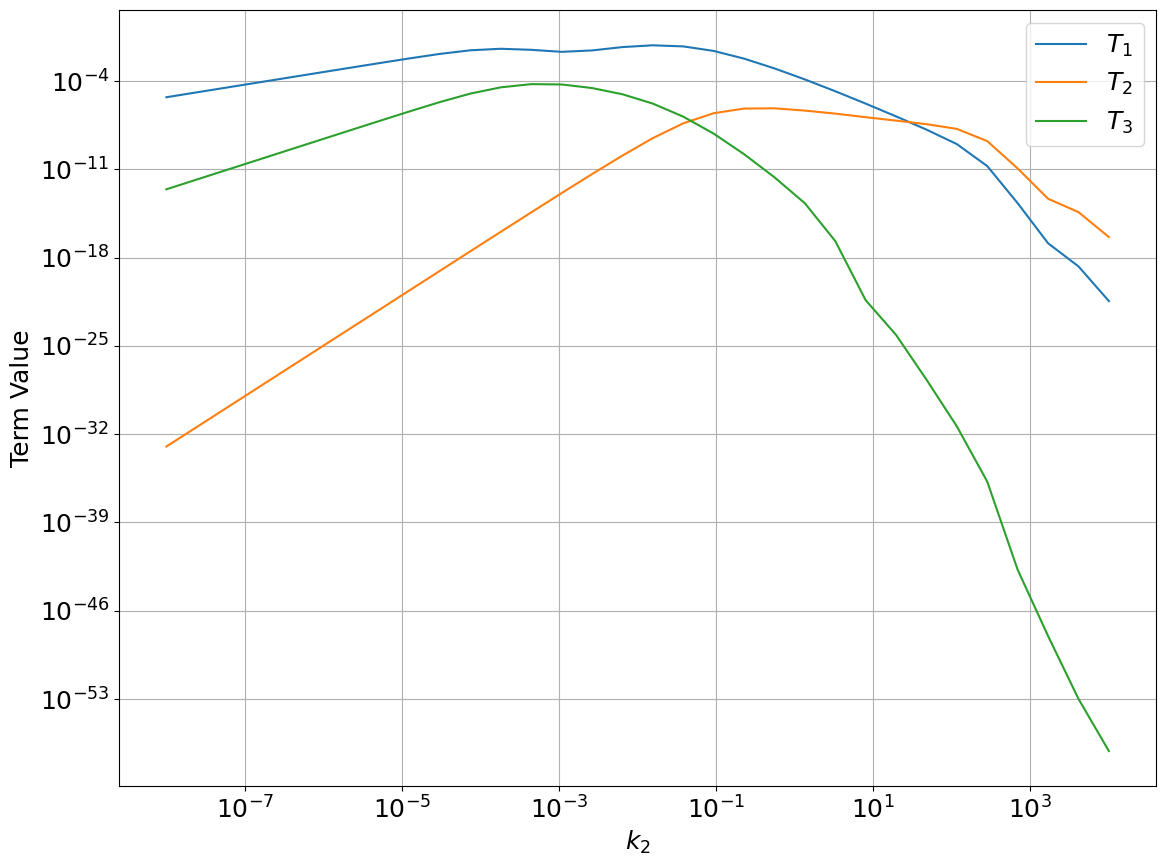

In [10]:
import numpy as np
import matplotlib.pyplot as pl

cases = [
    {
        "label": "k₂ = k₃",         
        "k2_func": lambda v: v,    
        "k3_func": lambda v: v,    
        "theta": 2*np.pi/3,
        "x_label": "$k$"
    },
    {
        "label": "k₂ ≫ k₃",         
        "k2_func": lambda v: 100*v, 
        "k3_func": lambda v: v,    
        "theta": np.pi/2,
        "x_label": "$k_3$"
    },
    {
        "label": "k₂ ≪ k₃",         
        "k2_func": lambda v: v,    
        "k3_func": lambda v: 100*v, 
        "theta": np.pi/2,
        "x_label": "$k_2$"
    },
]

k_vals = np.logspace(-8, 4, 32)

for case in cases:
    label = case["label"]
    k2_func = case["k2_func"]
    k3_func = case["k3_func"]
    theta = case["theta"]
    x_label = case["x_label"]

    t1_vals = [term_1(k2_func(v), k3_func(v)) for v in k_vals]
    t2_vals = [term_2(k2_func(v), k3_func(v)) for v in k_vals]
    t3_vals = [term_3(k2_func(v), k3_func(v), theta) for v in k_vals]

    pl.figure()
    pl.plot(k_vals, t1_vals, label="$T_1$")
    pl.plot(k_vals, t2_vals, label="$T_2$")
    pl.plot(k_vals, t3_vals, label="$T_3$")
    pl.xscale("log")
    pl.yscale("log")
    pl.xlabel(x_label)
    pl.ylabel("Term Value")
    pl.legend()
    pl.grid()
    pl.tight_layout()
    pl.savefig(f"C:/Users/Jay/Desktop/Master Thesis/fig_{label}.pdf", bbox_inches="tight")

    pl.show()
